<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Sleeptime_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

DATA EXTRACTION

In [ ]:
sleep = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/sleeptime_prediction_dataset.csv")
sleep.head(2), sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


(   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
 0         1.12         0.52       3.29       7.89          216.08   
 1         2.85         0.49       4.22       5.03          206.18   
 
    RelaxationTime  SleepTime  
 0            0.75       3.45  
 1            0.67       4.88  ,
 None)

DATA PREPROCESSING

---

In [ ]:
sleep = sleep.rename(columns={
    "WorkoutTime":"Exercise",
    "ReadingTime":"Reading",
    "PhoneTime":"Call",
    "WorkHours":"Work",
    "CaffeineIntake":"Coffee",
    "RelaxationTime":"Rest",
    "SleepTime":"Sleep"
})

In [ ]:
sleep.head(2)

,Exercise,Reading,Call,Work,Coffee,Rest,Sleep
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88


In [ ]:
sns.set()

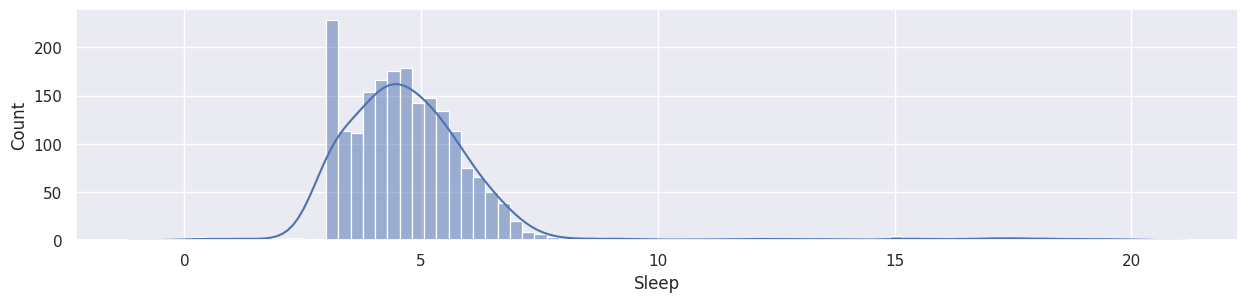

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(sleep['Sleep'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

In [ ]:
corr = sleep.corr()

In [ ]:
print(corr['Sleep'].sort_values(ascending=False).round(3)*100)

Sleep       100.0
Exercise     18.8
Rest         14.4
Reading       6.7
Coffee       -7.7
Work        -29.8
Call        -32.3
Name: Sleep, dtype: float64


In [ ]:
X = sleep.drop('Sleep', axis=1)
y = sleep['Sleep']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

rg = LinearRegression()

#rg = RandomForestRegressor(n_estimators=100, random_state=42)

rg.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_pred = rg.predict(X_test)
r2_score = r2_score(y_test,test_pred)

print(f"R2 Score for test is {r2_score}")

R2 Score for test is 0.22070872902984795
